<a href="https://colab.research.google.com/github/istvanbaksa/Data-Science-1/blob/main/Hands_On_Data_Analysis_with_Pandas_%E2%80%93_Second_Edition_Chapter_6_Exercises_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Hands-On Data Analysis with Pandas – Second Edition Chapter 6 Exercises

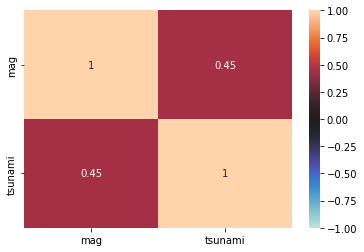

time: 615 ms (started: 2022-08-05 20:51:36 +00:00)


In [ ]:
'''
1. Using seaborn, create a heatmap to visualize the correlation coefficients between
earthquake magnitude and whether there was a tsunami for earthquakes measured
with the mb magnitude type.
'''
#!pip install ipython-autotime
#%load_ext autotime

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

earthquakes = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_02/data/earthquakes.csv')

df = earthquakes[(earthquakes.magType == 'mb')][['mag', 'tsunami']]

sns.heatmap(df.corr(), annot = True, center = 0, vmin = -1, vmax = 1)

In [ ]:
'''
2. Create a box plot of Facebook volume traded and closing prices, and draw reference
lines for the bounds of a Tukey fence with a multiplier of 1.5. The bounds will be
at Q1 − 1.5 × IQR and Q3 + 1.5 × IQR. Be sure to use the quantile() method on
the data to make this easier. (Pick whichever orientation you prefer for the plot, but
make sure to use subplots.)
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)

fb = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv', parse_dates = True)
fb = fb.reset_index()
fb = fb.set_index('date')

df = fb[['close', 'volume']]

cq1 = df.close.quantile(0.25)
cq3 = df.close.quantile(0.75)
iqr1 = cq3 - cq1

vq1 = df.volume.quantile(0.25)
vq3 = df.volume.quantile(0.75)
iqr2 = vq3 - vq1

abc = df.plot(kind='box', subplots = True, title = ['Closing Price', 'Volume Traded'])

abc[0].axhline(cq3 + 1.5 * iqr1,color='red',ls='--')
abc[0].axhline(cq1 - 1.5 * iqr1,color='red',ls='--')

abc[1].axhline(vq3 + 1.5 * iqr2, color='red',ls='--')
abc[1].axhline(vq1 - 1.5 * iqr2, color='red',ls='--')

plt.suptitle('Boxplot of Facebook Volume Traded and Closing Price\n(Dashed Line: Tukey Fence)', y = 1.05)

In [ ]:
'''
3. Plot the evolution of cumulative COVID-19 cases worldwide, and add a dashed
vertical line on the date that it surpassed 1 million. Be sure to format the tick labels
on the y-axis accordingly.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)

cov = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_06/data/covid19_cases.csv')
cov['date'] = pd.to_datetime(cov['dateRep'])
cov = cov.drop('dateRep', axis = 1)
cov = cov.set_index('date')
cov2 = cov[['cases']]
index = cov2.index
cov2 = cov2.groupby('date').agg(np.sum)
cov2['cumsum'] = cov2['cases'].cumsum()

plot1 = cov2['cumsum'].plot(kind = 'line', figsize = (16,8), label = 'Covid Cases')
plot1.set_ylabel('cumulative COVID-19 cases')

a = cov2[cov2['cumsum'] >= 1000000].index[0].strftime('%d.%m.%Y')

plt.axvline(a,color ="red", alpha = 0.8, lw = 1.5, ls='--', label = f'First day with over 1000000 cases in total: {a}.')
plot1.legend()

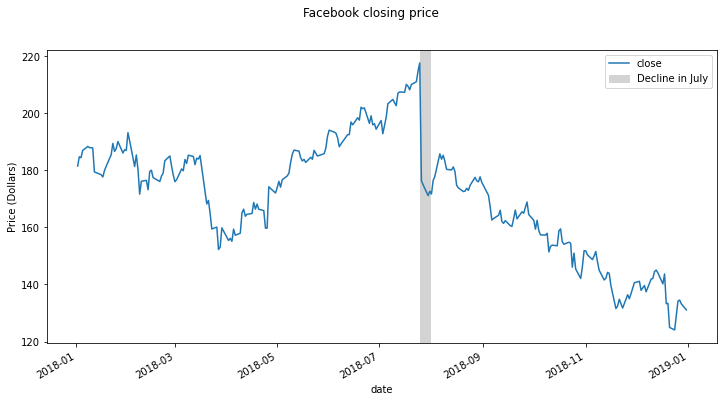

In [ ]:
'''
4. Use axvspan() to shade a rectangle from '2018-07-25' to '2018-07-31',
which marks the large decline in Facebook price on a line plot of the closing price.
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_rows', 200)

fb = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv')
fb['date'] = pd.to_datetime(fb['date'])
fb = fb.reset_index()
fb = fb.set_index('date')
plot1 = fb.close.plot(kind = 'line', figsize = (12,6))
plot1.set_ylabel('Price (Dollars)')
plt.axvspan('2018-07-25', '2018-07-31', color = 'lightgray', label = 'Decline in July')
plt.suptitle('Facebook closing price')
plt.legend()

In [ ]:
'''
5. Using the Facebook stock price data, annotate the following three events on a line
plot of the closing price:
a) Disappointing user growth announced after close on July 25, 2018
b) Cambridge Analytica story breaks on March 19, 2018 (when it affected the
market)
c) FTC launches investigation on March 20, 2018
'''

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

fb = pd.read_csv('https://raw.githubusercontent.com/stefmolin/Hands-On-Data-Analysis-with-Pandas-2nd-edition/master/ch_05/data/fb_stock_prices_2018.csv')
fb['date'] = pd.to_datetime(fb['date'])
fb = fb.set_index('date')

plot1 = fb.close.plot(kind = 'line', figsize = (20,10))

plot1.set_ylabel('Price (Dollars)')

plt.legend()

plt.suptitle('Facebook Closing Price', y = 0.92)

plot1.annotate('Disappointing user growth\nannounced after close\non July 25, 2018', xy = ('2018-07-25', fb.loc['2018-07-25', 'close']), 
               xytext = (0.4,0.9), textcoords = 'axes fraction', 
               arrowprops={'arrowstyle': '->'})

plot1.annotate('Cambridge Analytica story\nbreaks on March 19,\n2018 (when it affected the market)', xy = ('2018-03-19', fb.loc['2018-03-19', 'close']), 
               xytext = (0.07,0.32), textcoords = 'axes fraction', 
               arrowprops={'arrowstyle': '->'})

plot1.annotate('FTC launches investigation\non March 20, 2018', xy = ('2018-03-20', fb.loc['2018-03-20', 'close']), 
               xytext = (0.22,0.7), textcoords = 'axes fraction', 
               arrowprops={'arrowstyle': '->'})